<a href="https://colab.research.google.com/github/sandeepangh782/Analyzing-Suicide-Trends-Unveiling-Influential-Factors/blob/main/Factor_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install factor-analyzer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 33.3 MB/s eta 0:00:00
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42487 sha256=3c926feea4e517e6acc094650e28ffb6c65a7e38702b8e002797fa1c045a1697
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor-analyzer


In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
import matplotlib.pyplot as plt


In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [25]:
df1 = pd.read_csv(r'/content/gdrive/MyDrive/Multivariate/master.csv')

In [26]:
df1.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [27]:
df1.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [29]:
df1= df1.drop(labels=['HDI for year'],axis=1)
df1.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


In [37]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df1['age_encoded'] = label_encoder.fit_transform(df1['age'])
df1['country_encoded'] = label_encoder.fit_transform(df1['country'])
df1['sex_encoded'] = label_encoder.fit_transform(df1['sex'])
df1['generation_encoded'] = label_encoder.fit_transform(df1['generation'])
df1['gdp_year_encoded'] = label_encoder.fit_transform(df1[' gdp_for_year ($) '])




In [38]:
df1.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation,age_encoded,country_encoded,sex_encoded,generation_encoded,gdp_year_encoded
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X,0,0,1,2,726
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent,2,0,1,5,726
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X,0,0,0,2,726
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation,5,0,1,1,726
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers,1,0,1,0,726


In [44]:
selected_columns = ['age_encoded', 'gdp_year_encoded', 'country_encoded', 'sex_encoded', 'generation_encoded', 'suicides/100k pop']

# Subset the dataset with selected columns
df = df1[selected_columns]

In [45]:
df.head(5)

,age_encoded,gdp_year_encoded,country_encoded,sex_encoded,generation_encoded,suicides/100k pop
0,0,726,0,1,2,6.71
1,2,726,0,1,5,5.19
2,0,726,0,0,2,4.83
3,5,726,0,1,1,4.59
4,1,726,0,1,0,3.28


In [46]:
# Bartlett's Test
chi_square_value, p_value = calculate_bartlett_sphericity(df)
print("Bartlett's Test - Chi-square value:", chi_square_value)
print("Bartlett's Test - p-value:", p_value)

# Kaiser-Meyer-Olkin (KMO) Test
kmo_all, kmo_model = calculate_kmo(df)
print("KMO Model value:", kmo_model)


Bartlett's Test - Chi-square value: 7609.94849577284
Bartlett's Test - p-value: 0.0
KMO Model value: 0.45436172268372915


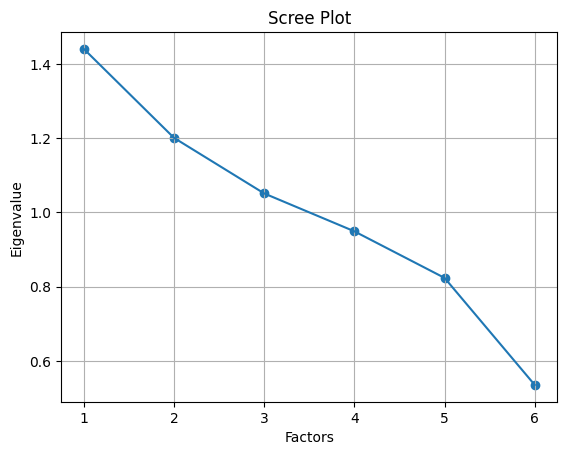

In [49]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(df)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
plt.scatter(range(1, df.shape[1] + 1), ev)
plt.plot(range(1, df.shape[1] + 1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


In [52]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors= 3, rotation="varimax")
fa.fit(df)

# Get factor loadings
factor_loadings = fa.loadings_
index_values = df.columns
# creating a list of column names
column_values = ['Factor1','Factor2','Factor3']
df2=pd.DataFrame(fa.loadings_,index_values,column_values)
df2


,Factor1,Factor2,Factor3
age_encoded,-0.020402,0.238793,0.187438
gdp_year_encoded,-0.000997,-0.015700,-0.004666
country_encoded,-0.004104,0.008957,0.055473
sex_encoded,0.993069,0.012837,0.093309
generation_encoded,-0.001931,0.990670,-0.116802
suicides/100k pop,0.304177,0.062365,0.948161


**Factor 1:** This factor seems to have strong loadings for "sex_encoded" (0.993) and moderate loadings for "suicides/100k pop" (0.304) and "generation_encoded" (-0.0019). The other variables have relatively small loadings on this factor.

**Interpretation:** Factor 1 appears to be primarily related to gender (sex_encoded). It suggests that this factor is strongly associated with gender differences in suicide rates. Higher positive values for this factor may indicate a higher likelihood of suicides among one gender compared to the other.

**Factor 2:** This factor has the highest loading for "age_encoded" (0.239) and also moderate loadings for "generation_encoded" (0.991) and "country_encoded" (0.009).

**Interpretation:** Factor 2 seems to be primarily related to age and generation. It suggests that this factor is capturing age and generational differences in suicide rates. Higher positive values for this factor may indicate that certain age groups or generations have higher suicide rates.

**Factor 3:** Factor 3 has the highest loading for "suicides/100k pop" (0.948), indicating a strong relationship with this variable. It also has moderate loadings for "generation_encoded" (-0.117) and "country_encoded" (0.055).

**Interpretation:** Factor 3 appears to be primarily related to the suicide rate per 100,000 population. It suggests that this factor is capturing variations in suicide rates themselves. Higher positive values for this factor may indicate higher overall suicide rates in certain countries or among certain generations.